In [1]:
#@title Import
from  sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedKFold

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [ ]:
#Get the data

fname = "nfl_draft.csv"
data = pd.read_csv(fname)
features = ['pass_int', 'pass_yds', 'pass_td', 'pass_att']
label = ['rnd']

#Filter out players who never played
data_mask = (data['pos']) == 'QB'
data = data[data_mask]
X_y = features + label
total_data = data[X_y]
total_data= total_data.dropna()
#Split into features and label
X_r = total_data[features]
y_r = total_data[label]
#create sseparate plot for each element in array
# for i in range(len(features)):
#     plt.figure(i)
#     plt.plot(X_r['pass_att'], X_r[features[i]], 'o')
#     plt.title(features[i] + ' vs ' + label[0])
plt.show()
not_checked = True
print(total_data)
for index, row in X_r.iterrows():
    if not_checked:
        if row['pass_yds']  == 0 or row['pass_td'] == 0:
            row['pass_td'] = 0
            row['pass_yds'] = 0
            continue
        # try:
        row['pass_int'] = row['pass_int'] / row['pass_att']
        row['pass_yds'] = row['pass_yds'] / row['pass_att']
        row['pass_td'] = row['pass_td'] / row['pass_att']
print(X_r)
features = ['pass_int', 'pass_yds', 'pass_td']
X_r = X_r[features]
print(X_r)

      pass_int  pass_yds  pass_td  pass_att  rnd
0         25.0    6722.0     42.0     913.0    1
1         18.0    5590.0     42.0     725.0    1
88         0.0      31.0      0.0       7.0    3
102        1.0     182.0      1.0      34.0    4
146        1.0      17.0      0.0       7.0    5
...        ...       ...      ...       ...  ...
8135     134.0   29979.0    207.0    4289.0    2
8155      36.0    6075.0     40.0     932.0    3
8240      42.0   10439.0     62.0    1701.0    6
8241      19.0    2584.0     11.0     464.0    6
8383      68.0   14715.0     86.0    2151.0   11

[283 rows x 5 columns]
      pass_int  pass_yds   pass_td  pass_att
0     0.027382  7.362541  0.046002     913.0
1     0.024828  7.710345  0.057931     725.0
88    0.000000  0.000000  0.000000       7.0
102   0.029412  5.352941  0.029412      34.0
146   1.000000  0.000000  0.000000       7.0
...        ...       ...       ...       ...
8135  0.031243  6.989741  0.048263    4289.0
8155  0.038627  6.518240  0.

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_names = X_r.copy()
X_scaled = scaler_x.fit_transform(X_r.to_numpy())
y_scaled = scaler_y.fit_transform(y_r.to_numpy())


In [ ]:
X, X_test, y, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=42)
print(y_test)

[[0.09090909]
 [0.45454545]
 [0.        ]
 [0.        ]
 [0.54545455]
 [0.18181818]
 [0.54545455]
 [0.54545455]
 [0.        ]
 [0.        ]
 [0.27272727]
 [0.90909091]
 [0.18181818]
 [0.18181818]
 [0.54545455]
 [0.63636364]
 [0.18181818]
 [0.09090909]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.72727273]
 [0.45454545]
 [0.54545455]
 [0.        ]
 [0.54545455]
 [0.09090909]]


In [ ]:
#Dummy Regressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X, y)
kf = KFold(5, shuffle=True, random_state=40)

scores = cross_val_score(dummy, X, y, cv=kf, scoring='neg_mean_squared_error')

print(scores.mean())
#plot the dummy
# plt.plot(X_test, y_test, 'o')


-0.0514672478326044


In [ ]:
#Linear LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

#Kfold crosss validaiton
# kf = KFold(n_splits=10, shuffle = True, random_state=40)
scores = cross_val_score(reg, X, y, cv=kf)
print(-scores.mean())


-0.05987238405359119


-0.059872384053591146
-0.019205218415549362
2.7742214853484928
1023.6285815060379


31179183.474322528
4460255164084237.5
9.017658639292644e+19
8.675618953033165e+22
1.1243948519535644e+23
1.4028803712847912e+25
2.2449848505844958e+24
4.499404972882918e+24
1.3787527905433196e+25
7.311434138957376e+25
1.832235172993102e+26
4.413197564121827e+26
8.358732716772561e+26
1.5389067299802402e+27
2.5020625091366835e+27


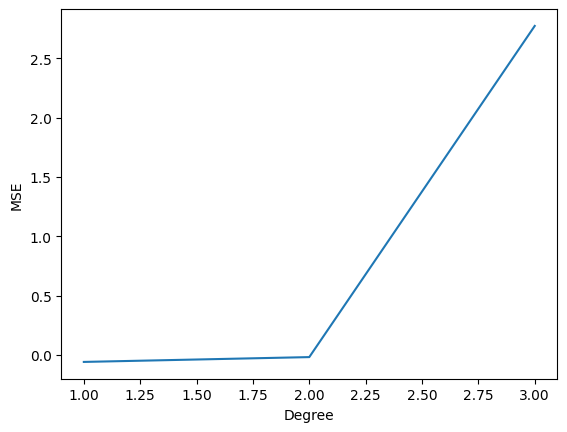

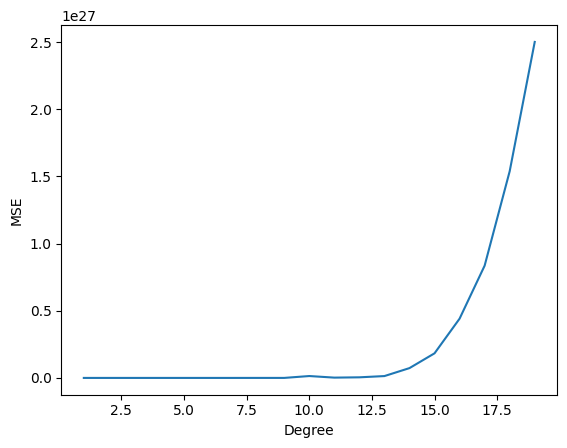

In [ ]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
scores_array = []
min_score = 100000
min_degree = 0
for k in range(1,20):
    poly = PolynomialFeatures(degree=k)
    poly_train = poly.fit_transform(X)
    poly_test = poly.fit_transform(X_test)
    model_poly = LinearRegression()
    model_poly.fit(poly_train, y)
    scores = cross_val_score(model_poly, poly_train, y, cv=kf)
    print(-scores.mean())
    scores_array.append(-scores.mean())
    if -scores.mean() < min_score:
        min_score = -scores.mean()
        min_degree = k
plt.plot(range(1,4), scores_array[0:3])
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

plt.plot(range(1,20), scores_array)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()
best_degree = min_degree


0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.03850249507280087
-0.026955363297874867
-0.014314917098779278
-0.014275835736157183
-0.014280213989662482
-0.014280531302677934


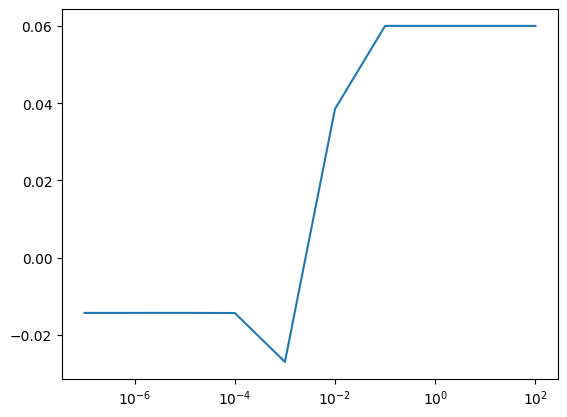

In [ ]:
# Lasso normalization
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
min = 100
min_index = 0
for i in [100, 10, 1, .1, .01, .001, .0001, .00001, .000001, .0000001]:
    lasso = Lasso(alpha=i, max_iter=10000)
    lasso.fit(X,y)

    #Kfold crosss validaiton
    kf = KFold(n_splits=10, shuffle = True, random_state=42)
    scores = cross_val_score(lasso, X, y, cv=kf)
    print(-scores.mean())
    x_axis.append(i)
    y_axis.append(-scores.mean())
    if -scores.mean() < min:
        min = -scores.mean()
        min_index = i

plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
best_l_l = min_index


0.059998647768586474
0.059998647768586474
10
1
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.03850249507280087
0.03850249507280087
0.01
1
0.03850249507280087
0.03850249507280087
0.03850249507280087
0.03850249507280087
0.03850249507280087
0.03850249507280087
0.03850249507280087
0.03850249507280087
-0.026955363297874867
-0.026955363297874867
0.001
1
-0.03572990468140895
-0.03572990468140895
0.001
2
-0.035683106346959016
-0.03562464294641591
-0.035642904275390144
-0.03564290422994969
-0.035642904

/home/wms29/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e-03, tolerance: 1.082e-03
  model = cd_fast.enet_coordinate_descent(


0.015803812692708676
0.04833492101765513
0.04962734725164103
0.049698563847968225
0.049746011273328804


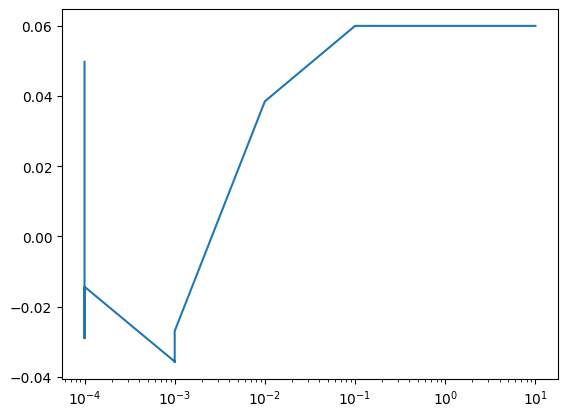

0.001 2
-0.03572990468140895


In [ ]:
# Lasso normalization
from sklearn.linear_model import Lasso

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
minimum = 10
min_i = 0
min_k = 0
for i in [ 10, 1, .1, .01, .001, .0001]:
    for k in range(1,10):
        lasso = Lasso(alpha=i, max_iter=1000)
        poly_fit = PolynomialFeatures(degree=k)
        poly_train = poly_fit.fit_transform(X)
        
        lasso.fit(poly_train,y)
        #Kfold crosss validaiton
        kf = KFold(n_splits=10, shuffle = True, random_state=42)
        scores = cross_val_score(lasso, poly_train, y, cv=kf)
        print(-scores.mean())
        x_axis.append(i)
        y_axis.append(-scores.mean())
        if -scores.mean() < minimum:
            minimum = -scores.mean()
            print(minimum)
            print(i)
            print(k)
            min_i = i
            min_k = k
plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
print(min_i, min_k)
print(minimum)
best_l_p = [min_i, min_k]


0.04727456571249079
0.04727456571249079
100
0.004771349551561066
0.004771349551561066
10
-0.01751147869921519
-0.01751147869921519
1
-0.0162774879735366
-0.014531497840447872
-0.014306259780205777
-0.01428313820413062
-0.014280819963337188


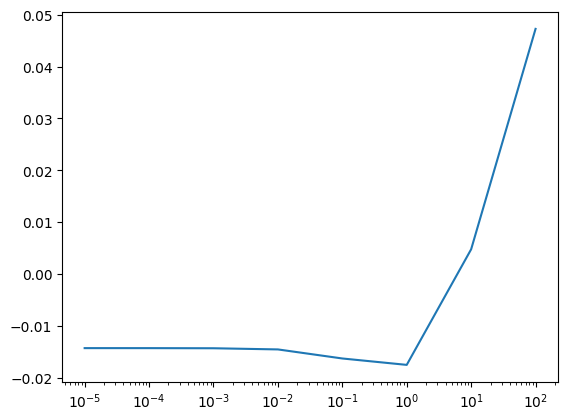

In [ ]:
# Lasso normalization
from sklearn.linear_model import Ridge 

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
minimum = 10
min_i = 0
for i in [100, 10, 1, .1, .01, .001, .0001, .00001]:
    ridge= Ridge(alpha=i, max_iter=10000)
    ridge.fit(X,y)

    #Kfold crosss validaiton
    kf = KFold(n_splits=10, shuffle = True, random_state=42)
    scores = cross_val_score(ridge, X, y, cv=kf)
    print(-scores.mean())
    x_axis.append(i)
    y_axis.append(-scores.mean())
    if -scores.mean() < minimum:
        minimum = -scores.mean()
        print(minimum)
        print(i)
        min_i = i


plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
best_r_l = min_i

0.004771349551561066
0.004771349551561066
10
1
0.004250281469359629
0.004250281469359629
10
2
0.003230155658732914
0.003230155658732914
10
3
0.0010367160270826404
0.0010367160270826404
10
4
-0.0011723181964443663
-0.0011723181964443663
10
5
-0.0029443029001333444
-0.0029443029001333444
10
6
-0.004248241159831578
-0.004248241159831578
10
7
-0.005176102175793363
-0.005176102175793363
10
8
-0.005828195464239827
-0.005828195464239827
10
9
-0.017511478699215165
-0.017511478699215165
1
1
-0.02452523172025852
-0.02452523172025852
1
2
-0.032734425213713426
-0.032734425213713426
1
3
-0.03755264589332158
-0.03755264589332158
1
4
-0.03955499703693086
-0.03955499703693086
1
5
-0.03971936756750365
-0.03971936756750365
1
6
-0.03876981613098003
-0.03720302171870697
-0.03534270866780477
-0.016277487973536554
-0.029442172751844686
-0.028280553458904158
-0.019355536363544944
-0.004326818815020584
0.014316529956196722
0.03394369583729408
0.05279506094778206
0.07005022639266524
-0.01453149784044776
-0.027

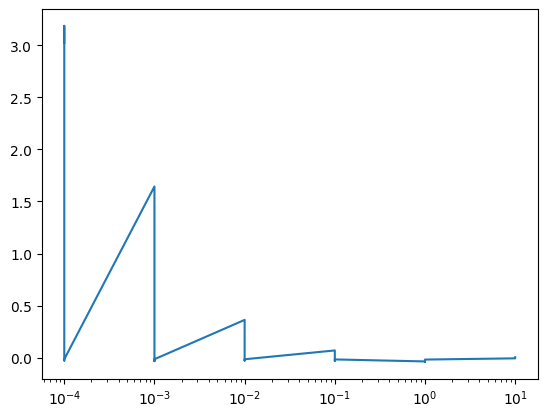

1 6
-0.03971936756750365


In [ ]:
# Lasso normalization
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
minimum = 10
min_i = 0
min_k = 0
for i in [ 10, 1, .1, .01, .001, .0001]:
    for k in range(1,10):
        ridge = Ridge(alpha=i, max_iter=10000)
        poly_fit = PolynomialFeatures(degree=k)
        poly_train = poly_fit.fit_transform(X)
        ridge.fit(poly_train,y)
        #Kfold crosss validaiton
        kf = KFold(n_splits=10, shuffle = True, random_state=42)
        scores = cross_val_score(ridge, poly_train, y, cv=kf)
        print(-scores.mean())
        x_axis.append(i)
        y_axis.append(-scores.mean())
        if -scores.mean() < minimum:
            minimum = -scores.mean()
            print(minimum)
            print(i)
            print(k)
            min_i = i
            min_k = k
plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
print(min_i, min_k)
print(minimum)
best_r_p = [min_i, min_k]


0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
-0.006718280091651385
-0.023389477094971356
-0.01457646556847957
-0.014307933556526353


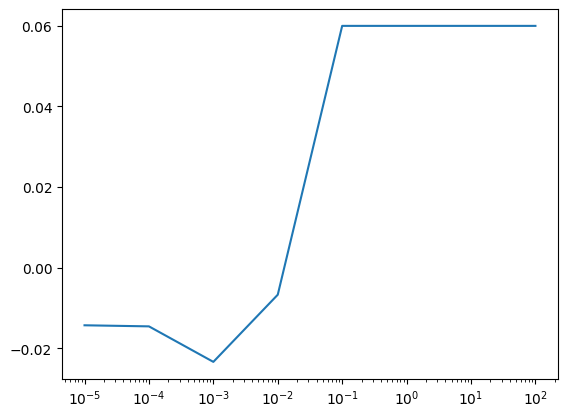

In [ ]:
# Lasso normalization
from sklearn.linear_model import ElasticNet 

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
min_i = 10
min_i_v = 0
for i in [100, 10, 1, .1, .01, .001, .0001, .00001]:
    en= ElasticNet(alpha=i, max_iter=10000)
    en.fit(X,y)

    #Kfold crosss validaiton
    kf = KFold(n_splits=10, shuffle = True, random_state=42)
    scores = cross_val_score(en, X, y, cv=kf)
    print(-scores.mean())
    x_axis.append(i)
    y_axis.append(-scores.mean())
    if -scores.mean() < min_i:
        min_i = -scores.mean()
        min_i_v = i


plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
best_en_l= min_i_v

0.059998647768586474
0.059998647768586474
10
1
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
0.059998647768586474
-0.006718280091651385
-0.006718280091651385
0.01
1
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.006718280091651385
-0.02338947709497132
-0.02338947709497132
0.001
1
-0.03156479595779225
-0.03156479595779225
0.001
2
-0.03102387850338455
-0.030652168381939193
-0.03078170994840824
-0.0308703673679

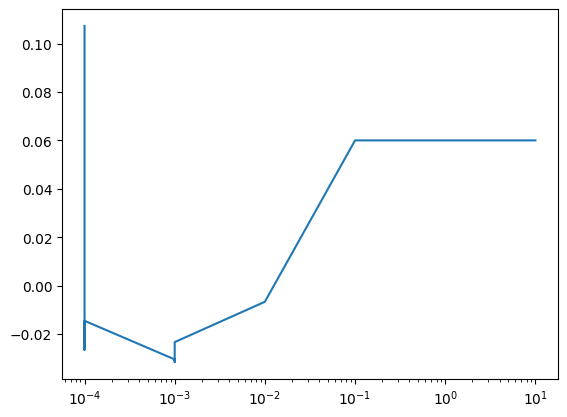

0.001 2
-0.03156479595779225


In [ ]:
# Lasso normalization
from sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
x_axis = []
y_axis = []
minimum = 10
min_i = 0
min_k = 0
for i in [ 10, 1, .1, .01, .001, .0001]:
    for k in range(1,10):
        en = ElasticNet(alpha=i, max_iter=10000)
        poly_fit = PolynomialFeatures(degree=k)
        poly_train = poly_fit.fit_transform(X)
        en.fit(poly_train,y)
        #Kfold crosss validaiton
        kf = KFold(n_splits=10, shuffle = True, random_state=42)
        scores = cross_val_score(en, poly_train, y, cv=kf)
        print(-scores.mean())
        x_axis.append(i)
        y_axis.append(-scores.mean())
        if -scores.mean() < minimum:
            minimum = -scores.mean()
            print(minimum)
            print(i)
            print(k)
            min_i = i
            min_k = k
plt.plot(x_axis, y_axis)
#log
plt.xscale('log')
# plt.yscale('log')
plt.show()
print(min_i, min_k)
print(minimum)
best_en_p = [min_i, min_k]



In [ ]:
X_train = X
y_train = y

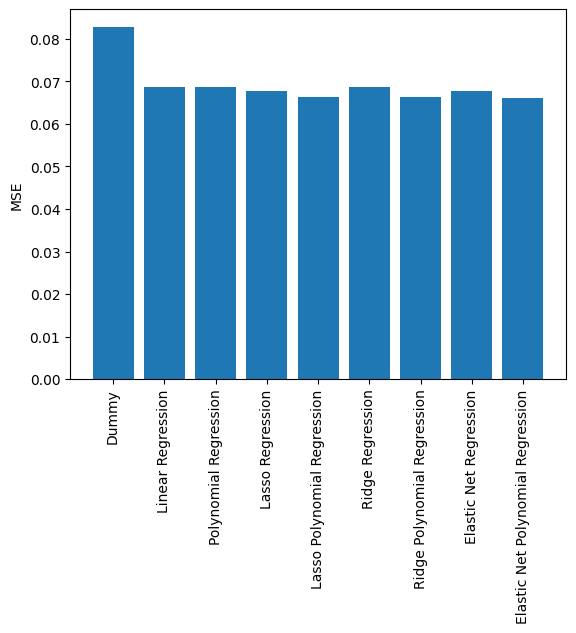

Elastic Net Polynomial Regression
0.0662207961548877


In [ ]:
from sklearn.metrics import mean_squared_error
mse = []
mse_title = []
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
mse_dummy = mean_squared_error(y_test, dummy.predict(X_test))
mse.append(mse_dummy)
mse_title.append('Dummy')


lin = LinearRegression()
lin.fit(X_train,y_train)
mse_lin = mean_squared_error(y_test, lin.predict(X_test))
mse.append(mse_lin)
mse_title.append('Linear Regression')

poly = PolynomialFeatures(degree=best_degree)
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
model_poly = LinearRegression()
model_poly.fit(poly_train, y_train)
mse_poly = mean_squared_error(y_test, model_poly.predict(poly_test))
mse.append(mse_poly)
mse_title.append('Polynomial Regression')

lasso = Lasso(alpha=best_l_l, max_iter=10000)
lasso.fit(X_train,y_train)
mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))
mse.append(mse_lasso)
mse_title.append('Lasso Regression')

lasso = Lasso(alpha=best_l_p[0], max_iter=10000)
poly_fit = PolynomialFeatures(degree=best_l_p[1])
poly_train = poly_fit.fit_transform(X_train)
lasso.fit(poly_train,y_train)
poly_test = poly_fit.fit_transform(X_test)
mse_lasso = mean_squared_error(y_test, lasso.predict(poly_test))
mse.append(mse_lasso)
mse_title.append('Lasso Polynomial Regression')

ridge = Ridge(alpha=best_r_l, max_iter=10000)
ridge.fit(X_train,y_train)
mse_ridge = mean_squared_error(y_test, ridge.predict(X_test))
mse.append(mse_ridge)
mse_title.append('Ridge Regression')

ridge = Ridge(alpha=best_r_p[0], max_iter=10000)
poly_fit = PolynomialFeatures(degree=best_r_p[1])
poly_train = poly_fit.fit_transform(X_train)
ridge.fit(poly_train,y_train)
poly_test = poly_fit.fit_transform(X_test)
mse_ridge = mean_squared_error(y_test, ridge.predict(poly_test))
mse.append(mse_ridge)
mse_title.append('Ridge Polynomial Regression')

en = ElasticNet(alpha=best_en_l, max_iter=10000)
en.fit(X_train,y_train)
mse_en = mean_squared_error(y_test, en.predict(X_test))
mse.append(mse_en)
mse_title.append('Elastic Net Regression')

en = ElasticNet(alpha=best_en_p[0], max_iter=10000)
poly_fit = PolynomialFeatures(degree=best_en_p[1])
poly_train = poly_fit.fit_transform(X_train)
en.fit(poly_train,y_train)
poly_test = poly_fit.fit_transform(X_test)
mse_en = mean_squared_error(y_test, en.predict(poly_test))
mse.append(mse_en)
mse_title.append('Elastic Net Polynomial Regression')


plt.bar(mse_title, mse)
plt.ylabel('MSE')
#rotate x label
plt.xticks(rotation=90)
plt.show()
#print the min of the list
#conver teach element to a float
minimum = 10
for i in range(len(mse)):
    if float(mse[i]) < minimum:
        minimum = float(mse[i])
        min_index = i
print(mse_title[min_index])
print(minimum)

In [ ]:
print(mse_title)

['Dummy', 'Linear Regression', 'Polynomial Regression', 'Lasso Regression', 'Lasso Polynomial Regression', 'Ridge Regression', 'Ridge Polynomial Regression', 'Elastic Net Regression', 'Elastic Net Polynomial Regression']
